## Support Vector Machines Classifier

Dataset link :  https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate

Dataset description :
                   I have used the Predicting a Pulsar Star dataset for this project.

Attribute Information:

         Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

Mean of the integrated profile.

Standard deviation of the integrated profile.

Excess kurtosis of the integrated profile.

Skewness of the integrated profile.

Mean of the DM-SNR curve.

Standard deviation of the DM-SNR curve.

Excess kurtosis of the DM-SNR curve.

Skewness of the DM-SNR curve.

Class

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\Priyanaka\Dataset\pulsar_stars.csv")

###  Exploratory data analysis

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
# We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. 
#The discrete variable is target_class variable. It is also the target variable.

In [7]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [8]:
# rename column names
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [9]:
df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [10]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

### Their is no missing value 

In [11]:
# check outlier

Text(0, 0.5, 'DM-SNR Skewness')

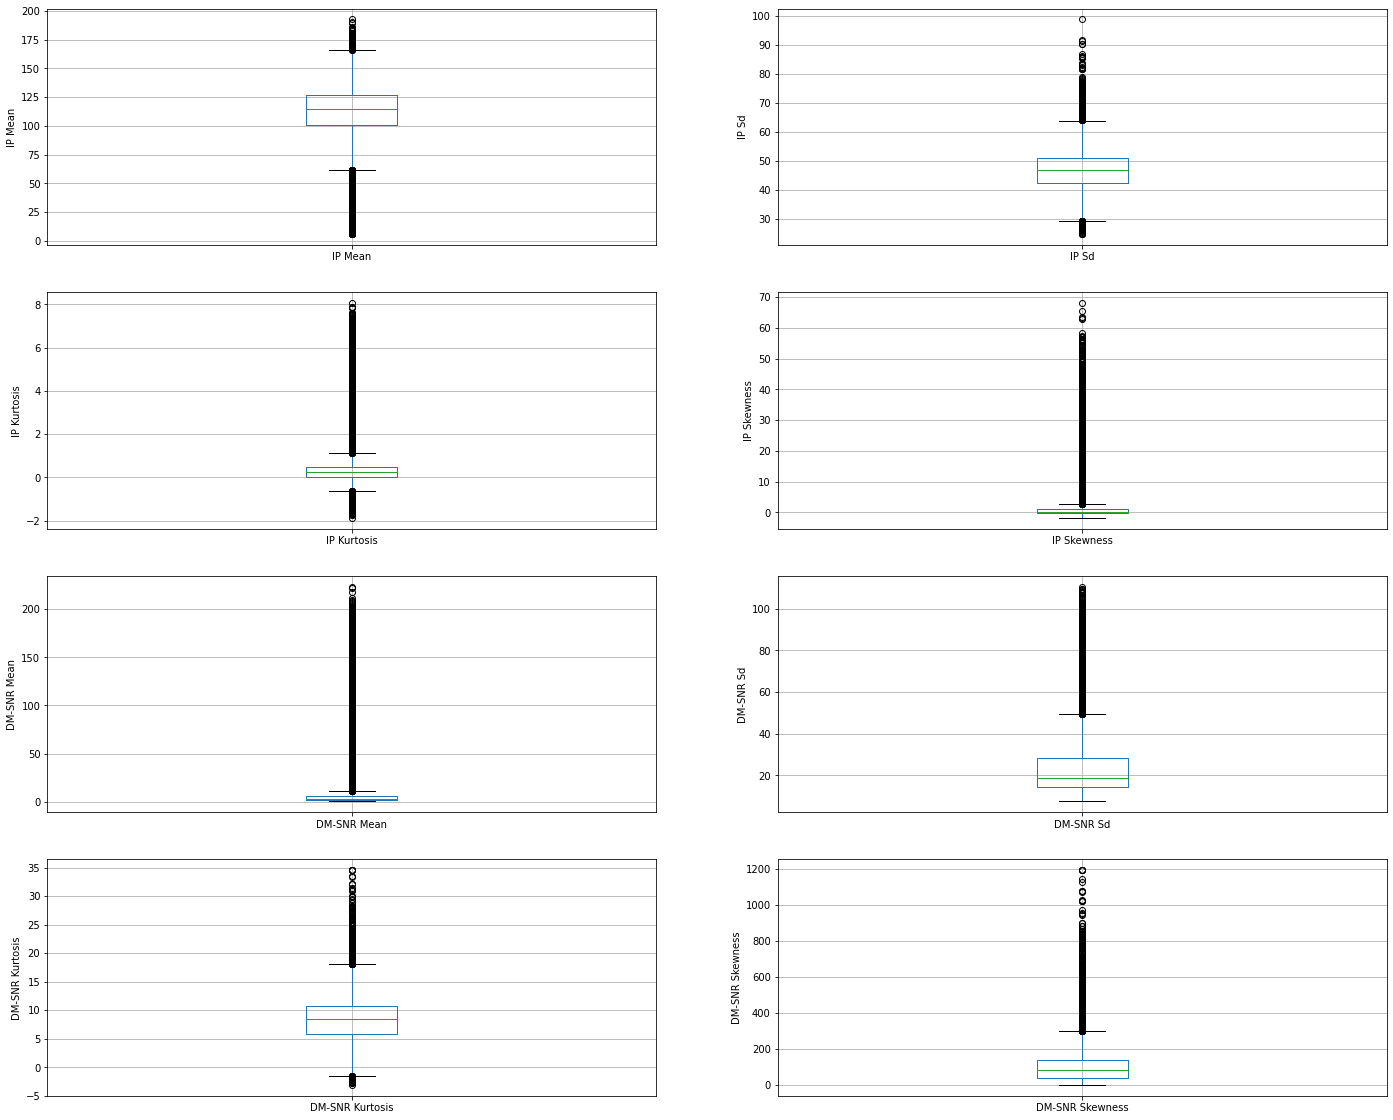

In [12]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = df.boxplot(column = 'IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4,2,3)
fig = df.boxplot(column = 'IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')


In [13]:
# there are lot of outliers in these variables.


Handle outliers with SVMs:

There are 2 variants of SVMs. They are hard-margin variant of SVM and soft-margin variant of SVM.

The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.

The message is that since the dataset contains outliers, so the value of C should be high while training the model.

In [14]:
#Check the distribution of variables

Text(0, 0.5, 'Number of pulsar stars')

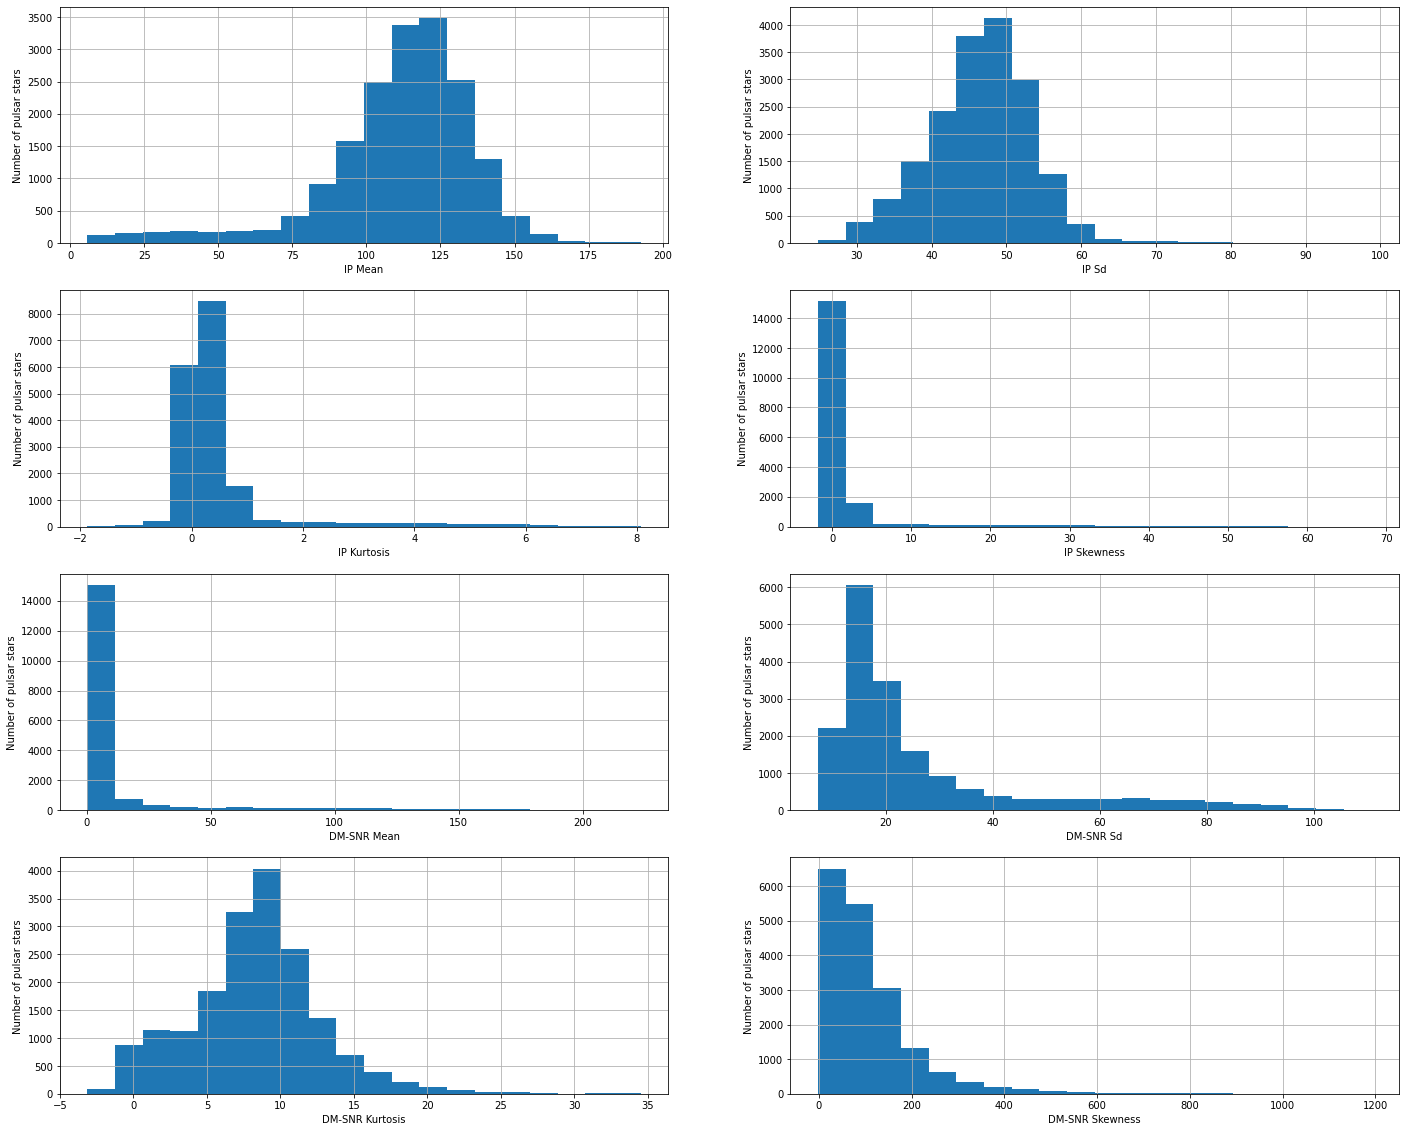

In [15]:
plt.figure(figsize= (24,20))

plt.subplot(4,2,1)
fig = df['IP Mean'].hist(bins = 20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

In [16]:
# We can see that all the 8 continuous variables are skewed.

In [17]:
# Select x and y

In [18]:
X = df.drop(['target_class'], axis = 1)
y = df['target_class']

In [19]:
# spilt x and y

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14318, 8)
(3580, 8)
(14318,)
(3580,)


In [22]:
# feacture scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Training SVM

In [24]:
from sklearn import svm

In [25]:
clf_svm_l = svm.SVC(kernel ='linear', C = 100)
clf_svm_l.fit(X_train_std,y_train)

SVC(C=100, kernel='linear')

### Predict values using trained model

In [26]:
y_train_pred = clf_svm_l.predict(X_train_std)
y_test_pred = clf_svm_l.predict(X_test_std)

### Model performance

In [27]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [28]:
c_matrix = confusion_matrix(y_test, y_test_pred)
c_matrix

array([[3289,   17],
       [  43,  231]], dtype=int64)

In [29]:
accuracy_score(y_test,y_test_pred)

0.9832402234636871

In [30]:
## Using Grid search

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000)}

In [33]:
clf_svm_l = svm.SVC(kernel='linear')

In [34]:
svm_grid_lin = GridSearchCV(clf_svm_l, param, n_jobs=-1,
                            cv=10, verbose=1, scoring='accuracy')

In [35]:
svm_grid_lin.fit(X_train_std, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:  6.3min finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [36]:
svm_grid_lin.best_params_

{'C': 500}

In [37]:
linsvm_clf = svm_grid_lin.best_estimator_

In [38]:
y_test_pred_Grid = linsvm_clf.predict(X_test_std)

In [39]:
accuracy_score(y_test,linsvm_clf.predict(X_test_std))

0.9832402234636871

### Polynomial

In [40]:
clf_svm_po = svm.SVC(kernel = 'poly' , degree = 2 , C = 0.1)
clf_svm_po.fit(X_train_std,y_train)

SVC(C=0.1, degree=2, kernel='poly')

In [41]:
y_train_pred_po = clf_svm_po.predict(X_train_std)
y_test_pred_po  = clf_svm_po.predict(X_test_std)

In [42]:
accuracy_score(y_test, y_test_pred)

0.9832402234636871

In [43]:
clf_svm_po.n_support_

array([537, 531])

### Radial

In [44]:
clf_svm_ra = svm.SVC(kernel = 'rbf',gamma = 0.5,C = 10)
clf_svm_ra.fit(X_train_std, y_train)

SVC(C=10, gamma=0.5)

In [45]:
y_train_pred = clf_svm_ra.predict(X_train_std)
y_test_pred = clf_svm_ra.predict(X_test_std)

In [46]:
accuracy_score(y_test,y_test_pred)

0.9835195530726257

In [47]:
## Using Grid search

In [48]:
params = {'C':(0.01,0.05, 0.1, 0.5, 1, 5, 10, 50), 
          'gamma':(0.001, 0.01, 0.1, 0.5, 1)}

In [49]:
clf_svm_r = svm.SVC(kernel = 'rbf')

In [50]:
clf_grid_r = GridSearchCV(clf_svm_r,params,n_jobs = -1,cv=3, verbose=1, scoring='accuracy')

In [51]:
clf_grid_r.fit(X_train_std, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   31.4s finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [52]:
clf_grid_r.best_params_

{'C': 50, 'gamma': 0.1}

In [53]:
r_svm_clf = clf_grid_r.best_estimator_

In [54]:
y_test_pred_Gr = r_svm_clf.predict(X_test_std)

In [55]:
accuracy_score(y_test,y_test_pred_Gr)

0.9840782122905027

We get maximum accuracy with rbf and linear kernel with C=10 and the accuracy is 0.9832 but using a grid search we got best distance C =50 in rbf and   C = 500 in linear then we get 0.9840 accuracy. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.